In [86]:
import networkx as nx
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import Counter

In [61]:
def display_hist(data_dict, bins, title, axis=None, reverse=False):
    if axis is None:
        axis = plt
    data = sorted([v for v in data_dict.values()], reverse=reverse)
    axis.hist(data, bins)
    axis.set_title(title)
    if axis is None:
        plt.show()

def display_loglog(data_dict, title, axis, reverse=False):
    if axis is None:
        axis = plt
    data = sorted([v for v in data_dict.values()], reverse=reverse)
    axis.loglog(data)
    axis.set_title(title)
    if axis is None:
        plt.show()

In [53]:
# analyze the distributions of a graph and display them on graphs
def analyze_distribution(G, graph_name):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    #connected components size distribution
    component_sizes = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    print(f'Number of conneced components: {len(component_sizes)}')
    print(f'Connected component sizes: {component_sizes}')
    axes[0, 0].bar([str(i + 1) for i in range(len(component_sizes))], component_sizes)
    axes[0, 0].set_title(f'Connected components of {graph_name}')
    largest_cc = max(nx.connected_components(G), key=len)
    S = G.subgraph(largest_cc).copy()
    # the length of S
    S_len = len(S)
    #degree distribution
    display_loglog({n:(d / S_len) for n, d in S.degree()}, f'Degree distribution of {graph_name}', axes[0, 1], True)
    #clustering coefficient distribution
    display_hist(nx.clustering(S), 20, f'Clustering coefficient distribution of {graph_name}', axes[1, 0])
    #betweenness centrality distribution
    betweenness = nx.betweenness_centrality(S)
    display_hist(betweenness, 20, f'Betweeness centrality distribution of {graph_name}', axes[1, 1])
    plt.savefig(f'{graph_name.replace(' ', '_')}.jpg')
    plt.show()

In [6]:
# load original graph
mtx_file = "./socfb-Caltech36/socfb-Caltech36.mtx"

# read in the original matrix
matrix = scipy.io.mmread(mtx_file)  # Load matrix
G_original = nx.from_scipy_sparse_array(matrix)
# read in the erdos matrix
G_erdos = nx.read_gml('erdos_renyi_random.gml')
# read in the barabasi matrix
G_barabasi = nx.read_gml("barabasi_scale_free.gml")

Distribution analysis
Number of conneced components: 4
Connected component sizes: [762, 3, 2, 2]


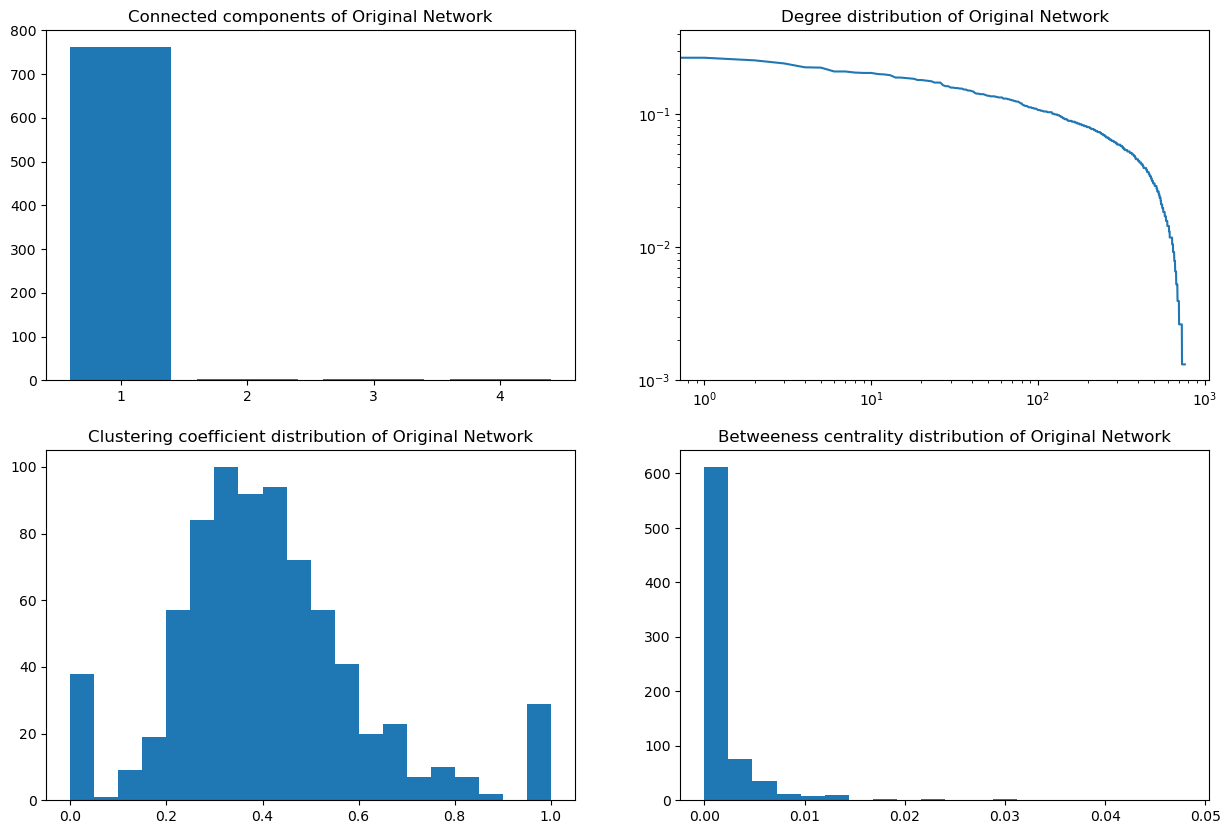

Number of conneced components: 1
Connected component sizes: [769]


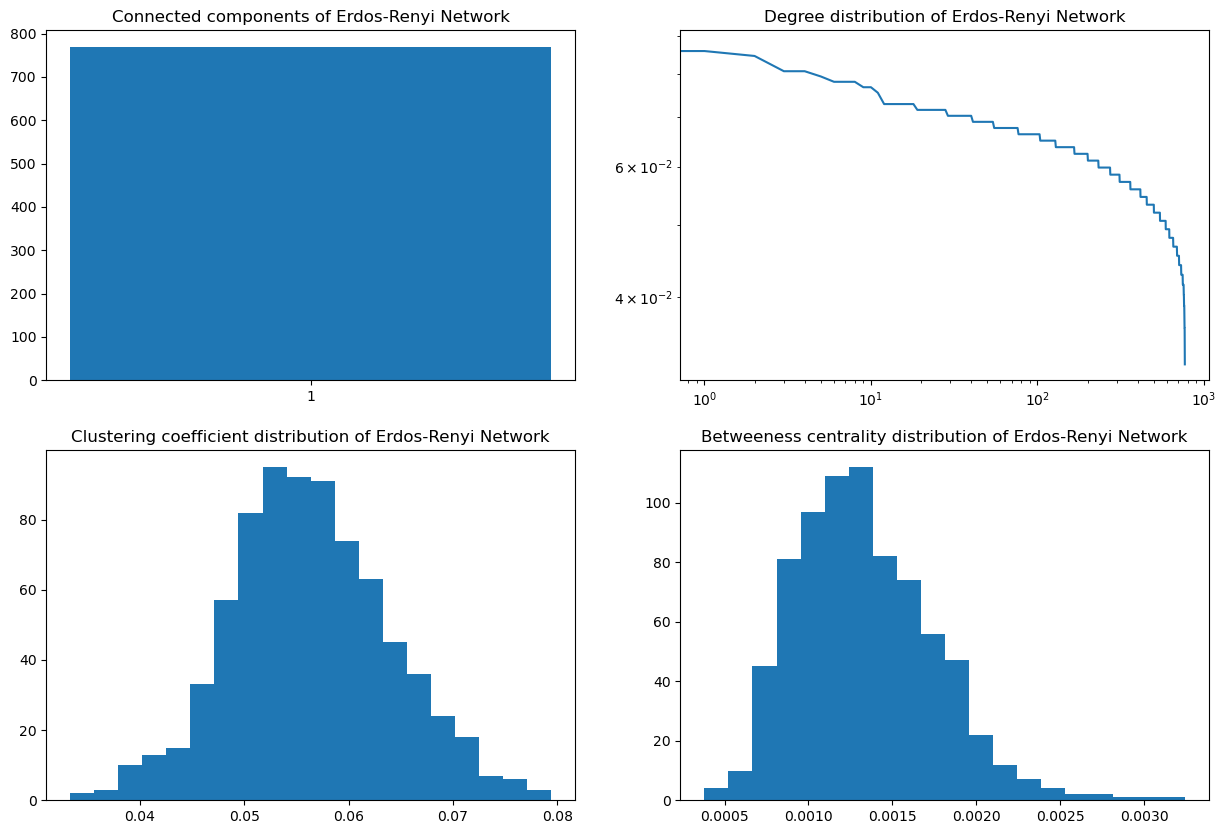

Number of conneced components: 1
Connected component sizes: [769]


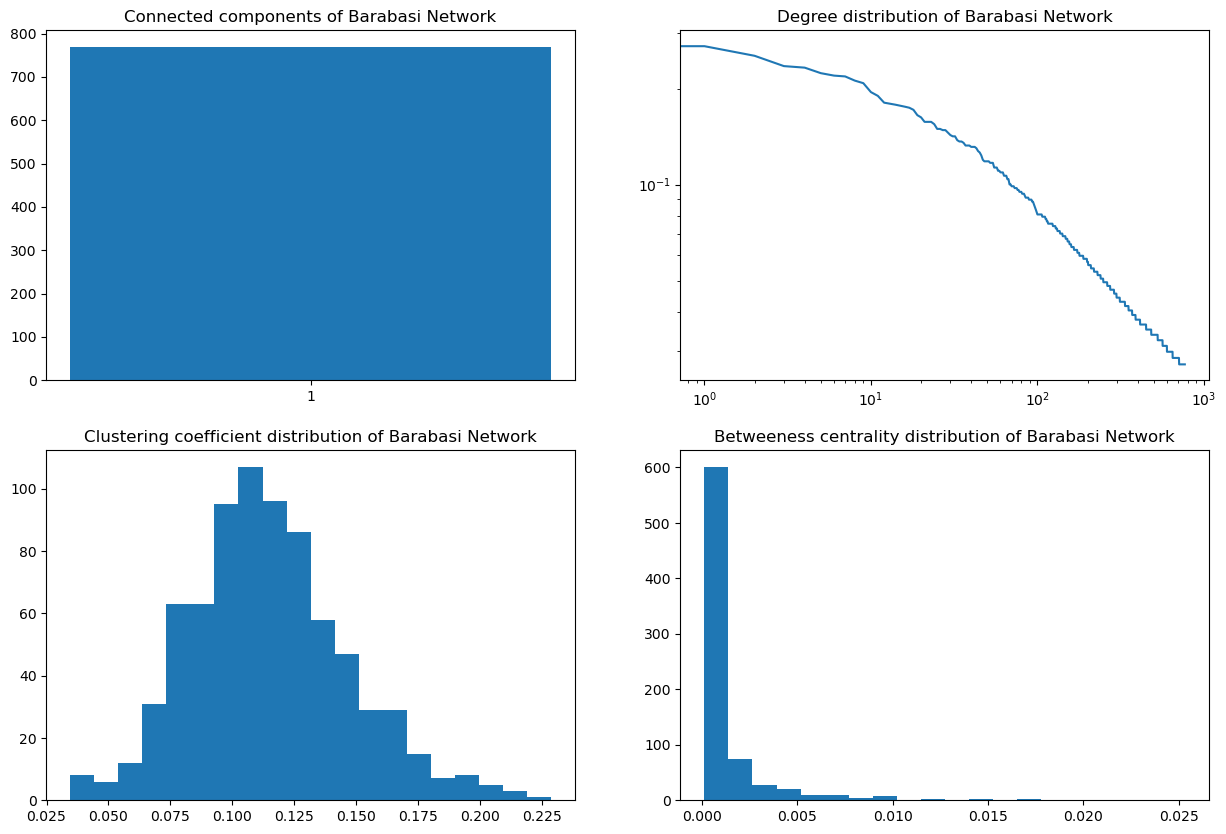

In [63]:
# analyze data
print("Distribution analysis")
analyze_distribution(G_original, 'Original Network')
analyze_distribution(G_erdos, 'Erdos-Renyi Network')
analyze_distribution(G_barabasi, 'Barabasi Network')

In [64]:
def top_n(centrality_dict, n):
    return sorted([(k, v) for k, v in centrality_dict.items()],reverse=True,key=lambda t: t[1])[:n]

# analyze the most important nodes in a graph and display the information
def analyze_centrality(G, graph_name):
    # get the largest connected component from the graph
    largest_cc = max(nx.connected_components(G), key=len)
    S = G.subgraph(largest_cc).copy()
    # calculate the four centralities
    degree = nx.degree_centrality(S)
    betweenness = nx.betweenness_centrality(S)
    closeness = nx.closeness_centrality(S)
    eigenvector = nx.eigenvector_centrality(S)
    # get the top n values
    N = 6
    degree = top_n(degree, N)
    betweenness = top_n(betweenness, N)
    closeness = top_n(closeness, N)
    eigenvector = top_n(eigenvector, N)
    # put the measures into a single tuple
    centralities = (degree, betweenness, closeness, eigenvector)
    # dipsplay them in a table
    # display the header
    middle = 'of the largest connected component of' if len(list(nx.connected_components(G))) > 1 else 'of'
    title = f'Centrality measures {middle} {graph_name}'
    print('{:^79s}'.format(title))
    print(('|'.join(['{:^19s}'] * 4)).format('Degree', 'Betweenness', 'Closeness', 'Eigenvector'))
    for i in range(N):
        # extract the values from the centralities tuple
        values = []
        for c in centralities:
            values.append(f'({c[i][0]})')
            values.append(c[i][1])
        print(('|'.join([' {:^6s} - {:.6f} '] * 4).format(*values)))
    print()

In [65]:
analyze_centrality(G_original, 'Original Graph')
analyze_centrality(G_erdos, 'Erdos-Renyi Graph')
analyze_centrality(G_barabasi, 'Barabasi Graph')

   Centrality measures of the largest connected component of Original Graph    
      Degree       |    Betweenness    |     Closeness     |    Eigenvector    
 (708)  - 0.325887 | (708)  - 0.047949 | (708)  - 0.574773 | (708)  - 0.131991 
  (89)  - 0.266754 | (222)  - 0.043367 |  (89)  - 0.553052 |  (89)  - 0.116052 
 (222)  - 0.254928 | (277)  - 0.030954 | (222)  - 0.543960 | (622)  - 0.114047 
 (663)  - 0.241787 |  (89)  - 0.029342 | (277)  - 0.538570 | (256)  - 0.111609 
 (256)  - 0.226018 | (354)  - 0.022289 | (686)  - 0.537050 | (663)  - 0.107220 
 (277)  - 0.224704 | (734)  - 0.021845 | (663)  - 0.535162 | (222)  - 0.100884 

                   Centrality measures of Erdos-Renyi Graph                    
      Degree       |    Betweenness    |     Closeness     |    Eigenvector    
 (741)  - 0.087240 | (741)  - 0.003241 | (689)  - 0.518569 | (741)  - 0.055267 
 (761)  - 0.085938 | (761)  - 0.003065 | (761)  - 0.518569 | (761)  - 0.054717 
 (689)  - 0.084635 | (689)  - 0.002871 

In [109]:
def plot_comparison(G_original, G_erdos, G_barabasi):
    
    def display(data_dict, title, axis, color, loglog=False, reverse=False, bins=30):
        if axis is None:
            axis = plt
        data = sorted([v for v in data_dict.values()], reverse=reverse)
        if loglog:
            axis.loglog(data, color=color)
        else:
            axis.hist(data, bins, histtype='step', color=color)
        axis.set_title(title)
        if axis is None:
            plt.show()
            
    fig, axes = plt.subplots(1, 3, figsize=(22.5, 5))
    graphs = [G_original.subgraph(max(nx.connected_components(G_original), key=len)).copy(), G_erdos, G_barabasi]
    colors = ['blue', 'green', 'red']
    handles = [
        mpatches.Patch(color='blue', label='Original Network'),
        mpatches.Patch(color='green', label='Erdos-Renyi Network'),
        mpatches.Patch(color='red', label='Barabasi-Albert Network')
    ]
    for i in range(len(graphs)):
        G = graphs[i]
        G_len = len(G)
        #degree distribution
        display({n:(d / G_len) for n, d in G.degree()}, f'Degree distribution', axes[0], colors[i], True, True)
        #clustering coefficient distribution
        display(nx.clustering(G), f'Clustering coefficient distribution', axes[1], colors[i])
        #betweenness centrality distribution
        betweenness = nx.betweenness_centrality(G)
        display(betweenness, f'Betweeness centrality distribution', axes[2], colors[i])


    plt.legend(handles=handles)
    plt.savefig(f'Comparison.jpg')
    plt.show()

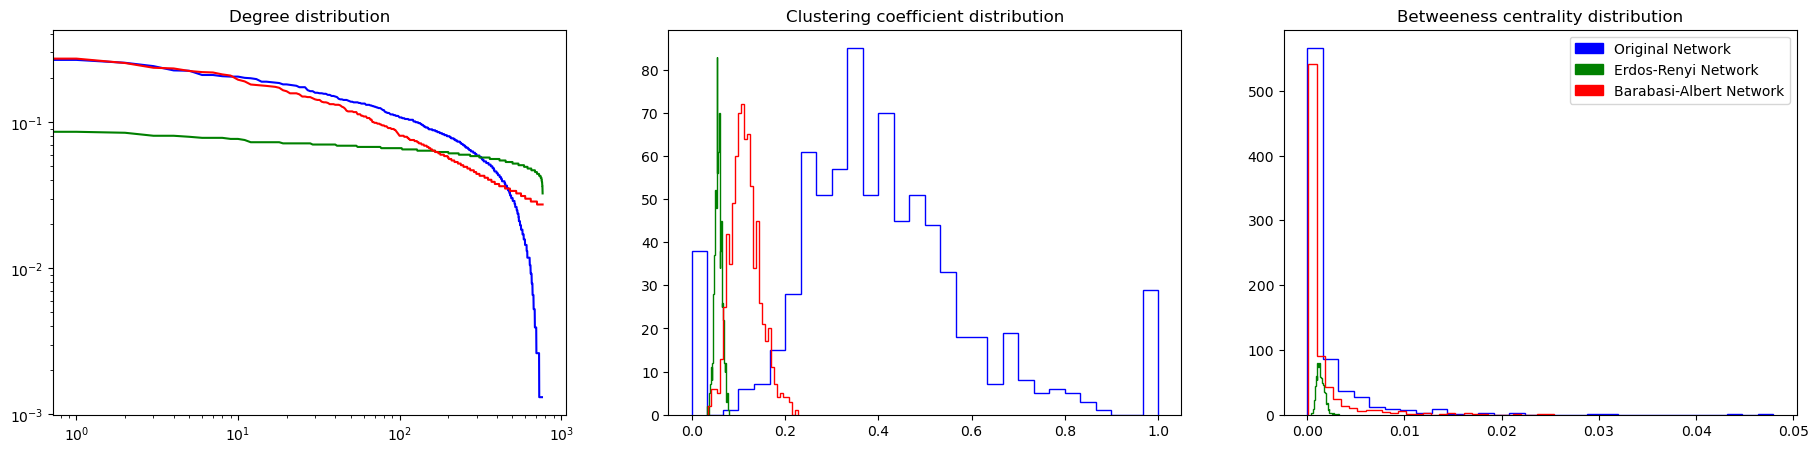

In [110]:
plot_comparison(G_original, G_erdos, G_barabasi)